### Import libraries

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [360]:
pd.set_option('display.max_rows', 150)

### Read data and get info

In [361]:
fp = './data/jobs_in_data.csv'
df = pd.read_csv(fp)

In [362]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


### Clean data and get insights

In [364]:
df.duplicated().sum()

4014

In [365]:
df.drop_duplicates(inplace=True)

In [366]:
df.duplicated().sum()

0

In [367]:
print(f'#rows: {df.shape[0]} \n#cols: {df.shape[1]}')

#rows: 5341 
#cols: 12


In [368]:
df.describe(exclude=np.number)

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,5341,5341,5341,5341,5341,5341,5341,5341,5341
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,1100,1655,4707,4255,3444,5296,2913,4301,4688


In [369]:
pd.DataFrame(
    {
        'Count':df.shape[0],
        'Null':df.isnull().sum(),
        'Null %':df.isnull().mean() * 100,
        'Cardinality':df.nunique()
    }
)

,Count,Null,Null %,Cardinality
work_year,5341,0,0.0,4
job_title,5341,0,0.0,125
job_category,5341,0,0.0,10
salary_currency,5341,0,0.0,11
salary,5341,0,0.0,1507
salary_in_usd,5341,0,0.0,1786
employee_residence,5341,0,0.0,83
experience_level,5341,0,0.0,4
employment_type,5341,0,0.0,4
work_setting,5341,0,0.0,3


In [370]:
df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

company_location
Qatar                       300000.000000
Puerto Rico                 167500.000000
Japan                       165500.000000
United States               157722.150198
Canada                      139550.555556
Saudi Arabia                134999.000000
New Zealand                 125000.000000
Australia                   121808.409091
Ukraine                     121333.333333
Bosnia and Herzegovina      120000.000000
Israel                      117029.500000
Ireland                     110236.875000
United Kingdom              107913.388268
Switzerland                 101659.400000
Mexico                      101000.000000
South Africa                100492.500000
Iraq                        100000.000000
Iran                        100000.000000
Mauritius                   100000.000000
Algeria                     100000.000000
China                       100000.000000
United Arab Emirates        100000.000000
Sweden                       98791.333333
Lithuania        

In [371]:
df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)

job_category
Machine Learning and AI           170453.221374
Data Science and Research         157131.039879
Data Architecture and Modeling    157054.006173
Cloud and Database                155000.000000
Leadership and Management         149020.108262
Data Engineering                  142967.543103
BI and Visualization              128377.734043
Data Management and Strategy      107655.836735
Data Analysis                     106707.058096
Data Quality and Operations       104586.022222
Name: salary_in_usd, dtype: float64

In [372]:
df['job_category'].value_counts()

job_category
Data Science and Research         1655
Data Engineering                  1160
Machine Learning and AI            917
Data Analysis                      809
Leadership and Management          351
BI and Visualization               188
Data Architecture and Modeling     162
Data Management and Strategy        49
Data Quality and Operations         45
Cloud and Database                   5
Name: count, dtype: int64

In [373]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

job_title
Analytics Engineering Manager               399880.000000
Data Science Tech Lead                      375000.000000
Managing Director Data Science              300000.000000
Head of Machine Learning                    259000.000000
AWS Data Architect                          258000.000000
Cloud Data Architect                        250000.000000
AI Architect                                233656.000000
Director of Data Science                    215447.629630
Machine Learning Software Engineer          212907.692308
Data Analytics Lead                         210874.666667
Data Infrastructure Engineer                201375.416667
Data Science Director                       201000.000000
Head of Data                                198194.666667
ML Engineer                                 198056.873684
Principal Data Scientist                    194089.600000
Head of Data Science                        189076.545455
Data Science Manager                        186728.861111
Appl

In [374]:
df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

company_size
M    150289.504266
L    125767.260606
S     90849.196203
Name: salary_in_usd, dtype: float64

In [375]:
df.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False)

salary_currency
USD    155193.943488
CHF    101659.400000
CAD     98408.081081
GBP     93414.536232
SGD     81724.333333
AUD     78538.181818
EUR     66896.028369
PLN     36099.428571
DKK     31192.666667
BRL     26168.750000
TRY     22189.333333
Name: salary_in_usd, dtype: float64

In [376]:
#compute the kurtosis and skewness of salary
salary_skew = df['salary_in_usd'].skew()
salary_kurt = df['salary_in_usd'].kurt()

print('Salary Skewness:', round(salary_skew, 3))
print('Salary Kurtosis:', round(salary_kurt, 3))

Salary Skewness: 0.657
Salary Kurtosis: 0.548


<Axes: >

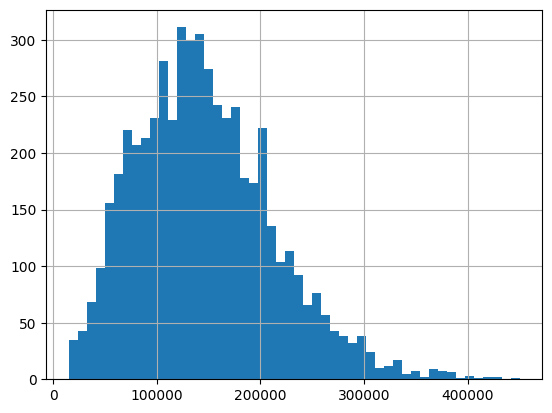

In [377]:
df['salary_in_usd'].hist(bins=50)

### Data preparation

In [378]:
df['company_location'].value_counts()[:10]

company_location
United States     4301
United Kingdom     358
Canada             198
Germany             71
Spain               59
France              49
Portugal            24
Australia           22
Netherlands         21
Brazil              17
Name: count, dtype: int64

In [379]:
# Only keep top 9 countries, reduces data to 5044
countries = ['United States', 'United Kingdom', 'Canada', 'Germany',' Spain', 'France', 'Portugal', 'Australia', 'Netherlands']

df = df[df['company_location'].isin(countries)]

In [380]:
df.drop(['job_title', 'salary', 'employee_residence'], axis=1, inplace=True)

In [381]:
df.head()

,work_year,job_category,salary_currency,salary_in_usd,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data Engineering,EUR,95012,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architecture and Modeling,USD,186000,Senior,Full-time,In-person,United States,M
2,2023,Data Architecture and Modeling,USD,81800,Senior,Full-time,In-person,United States,M
3,2023,Data Science and Research,USD,212000,Senior,Full-time,In-person,United States,M
4,2023,Data Science and Research,USD,93300,Senior,Full-time,In-person,United States,M


### Pipeline

In [382]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [383]:
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

In [384]:

# Separate numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [386]:
xgb_model = xgb.XGBRegressor(n_estimators=10)

# Include preprocessing in the training pipeline
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', xgb_model)])

# Train the model
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['work_year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job_category', 'salary_currency', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_s...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=10, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [387]:
predictions = full_pipeline.predict(X_test)

In [388]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Absolute Error: 40556.061040479435
Mean Squared Error: 2875359652.842396


In [389]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

R² Score: 0.32951685469195535


In [390]:
# Access the trained XGBoost model from the pipeline
xgb_model = full_pipeline.named_steps['model']

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Assuming you have a list of feature names
feature_names = numeric_features.tolist() + categorical_features.tolist()

In [391]:
# Access the one-hot encoder from the pipeline
onehot_encoder = full_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# Get the feature names after one-hot encoding
categorical_feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_features)

# Combine numerical feature names with one-hot encoded feature names
all_feature_names = np.concatenate([numeric_features, categorical_feature_names])

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                                        Feature  Importance
15                          salary_currency_USD    0.414121
3                    job_category_Data Analysis    0.204466
19                      experience_level_Senior    0.068753
17                   experience_level_Executive    0.049954
10         job_category_Machine Learning and AI    0.042722
16                 experience_level_Entry-level    0.022599
7      job_category_Data Quality and Operations    0.019492
1             job_category_BI and Visualization    0.016991
18                   experience_level_Mid-level    0.015501
8        job_category_Data Science and Research    0.014824
6     job_category_Data Management and Strategy    0.014544
34               company_location_United States    0.012844
12                          salary_currency_CAD    0.010760
26                          work_setting_Remote    0.010215
20                     employment_type_Contract    0.007813
5                 job_category_Data Engi